# Estudo sobre as instituições da área de educação do Recife

## O objetivo desse estudo é realizar uma análise exploratória a partir dos dados sobre as escolas e creches da rede municipal da cidade de Recife - PE.

### Os dados estão disponíveis no portal http://dados.recife.pe.gov.br/
##### *Os dados foram atualizados em 19 de outubro de 2021.

In [1]:
# importanto bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_escolas_total = pd.read_csv('info_unidadesensino_07102021.csv', sep=';') # lendo o arquivo csv baixado

In [3]:
df_escolas_total.head(1) # observação da primeira linha do conjunto de dados

,rpa,tipo_cod,tipo,cod_escola,escola,inep,rua,numero,cod_bairro,bairro,...,qtd_professores,escola_climatizada,data_visita,quadra_coberta,quadra_descoberta,biblioteca,sala_recurso,gestor,longitude,latitude
0,1,1,ESCOLA MUNICIPAL,90,ALMIRANTE SOARES DUTRA,26120658.0,CAMUTANGA,180,51,CABANGA,...,12,SIM,27/2/2018,NÃO,NÃO,SIM,SIM,VERONICA MARIA LIMA,-34.89535,-8.07895


# Análise Exploratória dos Dados 
### Análise Geral das informações contidas no conjunto de dados 
### Limpeza de variáveis irrelevantes e tratamento dos dados faltantes

In [4]:
df_escolas_total.info() # informação geral dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rpa                 351 non-null    int64  
 1   tipo_cod            351 non-null    int64  
 2   tipo                351 non-null    object 
 3   cod_escola          351 non-null    int64  
 4   escola              351 non-null    object 
 5   inep                349 non-null    float64
 6   rua                 345 non-null    object 
 7   numero              351 non-null    object 
 8   cod_bairro          351 non-null    int64  
 9   bairro              351 non-null    object 
 10  metragem            312 non-null    object 
 11  qtd_alunos          351 non-null    int64  
 12  qtd_turmas          351 non-null    int64  
 13  qtd_professores     351 non-null    int64  
 14  escola_climatizada  351 non-null    object 
 15  data_visita         125 non-null    object 
 16  quadra_c

#### Percebe-se que as variáveis inep, data_visita, gestor e metragem não são interessantes para modelagem dos dados ou estão com muitos dados faltantes. Essas variáveis serão excluídas das análises posteriores.

In [5]:
df_escolas = df_escolas_total.drop(columns=['inep', 'data_visita', 'gestor', 'metragem']) # retirando variáveis irrelevantes para análise

In [6]:
null_data = df_escolas[df_escolas.isnull().any(axis=1)] # observando quais dados estão faltando no dataset
null_data

,rpa,tipo_cod,tipo,cod_escola,escola,rua,numero,cod_bairro,bairro,qtd_alunos,qtd_turmas,qtd_professores,escola_climatizada,quadra_coberta,quadra_descoberta,biblioteca,sala_recurso,longitude,latitude
24,1,8,CRECHE ESC.RECIFE,35,PORTO DIGITAL DO RECIFE,NaN,050,19,RECIFE,82,5,4,NÂO,NÃO,NÃO,NÃO,NÃO,-34.87260,-8.06456
148,3,8,CRECHE ESC.RECIFE,43,CRECHE ESCOLA RECIFE ALTO DO MANDU,NaN,S/N,485,MONTEIRO,158,7,8,NÂO,NÃO,SIM,NÃO,NÃO,NaN,NaN
152,3,8,CRECHE ESC.RECIFE,494,PROFESSOR ARIANO VILAR SUASSUNA,DON MANUEL DE MEDEIROS,S/N,590,DOIS IRMAOS,146,7,6,NÂO,NÃO,NÃO,SIM,NÃO,NaN,NaN
156,4,1,ESCOLA MUNICIPAL,36,CREUSA DE FREITAS CAVALCANTI,EPAMINONDAS CRISTOVAO DE OLIVEIRA,S/N,701,TORROES,633,27,20,NÂO,NÃO,NÃO,SIM,NÃO,NaN,NaN
206,4,8,CRECHE ESC.RECIFE,74,ASSOCIACAO CRISTA FEMININA,NaN,68,655,TORRE,163,8,7,NÂO,NÃO,NÃO,NÃO,NÃO,-34.90905,-8.04210
209,4,8,CRECHE ESC.RECIFE,8,MIGUEL ARRAES RODA DE FOGO,NaN,S/N,701,TORROES,233,10,8,NÂO,NÃO,NÃO,SIM,NÃO,NaN,NaN
271,6,1,ESCOLA MUNICIPAL,37,CLARICE LISPECTOR,NaN,S/N,213,IPSEP,288,17,9,NÂO,SIM,NÃO,SIM,SIM,-34.92542,-8.10370
330,6,2,CRECHE MUNICIPAL,117,CRECHE CRISTO REI JORDAO ALTO,NaN,200,221,JORDAO,67,4,4,NÂO,NÃO,NÃO,NÃO,NÃO,NaN,NaN
350,6,8,CRECHE ESC.RECIFE,492,MAURICEIA DA SILVA DIAS,PRESIDENTE MEDICI,SN,876,BARRO,182,8,6,NÂO,NÃO,NÃO,SIM,NÃO,NaN,NaN


### Tratamento dos dados faltantes a partir de informações obtidas no Google.

In [7]:
df_escolas.iloc[148, 5] = 'SEGUNDA TRAVESSA SIRIJI'
df_escolas.loc[148, 'longitude'] = -34.929303146908495
df_escolas.loc[148, 'latitude'] = -8.02363956625748

df_escolas.iloc[24, 5] = 'RIO BRANCO'
df_escolas.iloc[24, 6] = 193
df_escolas.loc[24, 'longitude'] = -34.873220778790056
df_escolas.loc[24, 'latitude'] = -8.062652409100485

df_escolas.loc[152, 'longitude'] = -34.9491789712016
df_escolas.loc[152, 'latitude'] = -8.01114823612617

df_escolas.loc[156, 'longitude'] = -34.93563747880213
df_escolas.loc[156, 'latitude'] = -8.061464930355546

df_escolas.iloc[206, 5] = 'RUA VERMELHA'

df_escolas.iloc[209, 5] = 'PINTOR HÉLIO FEIJÓ'
df_escolas.iloc[209, 6] = 2
df_escolas.loc[209, 'longitude'] = -34.93720507353493
df_escolas.loc[209, 'latitude'] = -8.059600088934724

df_escolas.iloc[271, 5] = 'AUSTRO COSTA'

df_escolas.iloc[330, 5] = 'SERTÂNIA'
df_escolas.loc[330, 'longitude'] = -34.94504608864826
df_escolas.loc[330, 'latitude'] = -8.135660714997003

df_escolas.iloc[350, 5] = 'ANDRÉ VIDAL DE MEDEIROS'
df_escolas.loc[350, 'longitude'] = -34.9572674256219
df_escolas.loc[350, 'latitude'] = -8.107105212723406

In [8]:
df_escolas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rpa                 351 non-null    int64  
 1   tipo_cod            351 non-null    int64  
 2   tipo                351 non-null    object 
 3   cod_escola          351 non-null    int64  
 4   escola              351 non-null    object 
 5   rua                 351 non-null    object 
 6   numero              351 non-null    object 
 7   cod_bairro          351 non-null    int64  
 8   bairro              351 non-null    object 
 9   qtd_alunos          351 non-null    int64  
 10  qtd_turmas          351 non-null    int64  
 11  qtd_professores     351 non-null    int64  
 12  escola_climatizada  351 non-null    object 
 13  quadra_coberta      351 non-null    object 
 14  quadra_descoberta   351 non-null    object 
 15  biblioteca          351 non-null    object 
 16  sala_rec

In [9]:
# Análise geral com o cálculo do número total de alunos matriculados, professores e turmas cadastradas.
total_alunos = df_escolas['qtd_alunos'].sum()
total_professores = df_escolas['qtd_professores'].sum()
total_turmas = df_escolas['qtd_turmas'].sum()
print(f'Há um total de \033[1m{total_alunos} alunos matriculados\033[0m em instituições escolares na cidade de Recife.')
print(f'Em relação aos professores, tem-se um total de \033[1m{total_professores} professores\033[0m cadastrados em instituições escolares na cidade de Recife.')
print(f'Por fim, há um total de \033[1m{total_turmas} turmas\033[0m cadastradas.')


Há um total de 95288 alunos matriculados em instituições escolares na cidade de Recife.
Em relação aos professores, tem-se um total de 3992 professores cadastrados em instituições escolares na cidade de Recife.
Por fim, há um total de 4648 turmas cadastradas.


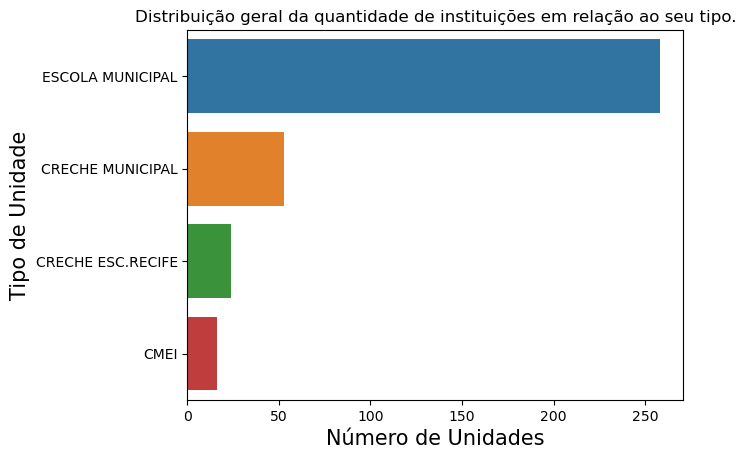

In [54]:
# Observando a distribuição dos tipos de institução de ensino que estão presentes no conjunto de dados
ax = sns.countplot(y='tipo', 
              data=df_escolas, 
              order=['ESCOLA MUNICIPAL', 'CRECHE MUNICIPAL', 'CRECHE ESC.RECIFE', 'CMEI'],
                  )
ax.set_xlabel('Número de Unidades', fontsize=15)
ax.set_ylabel('Tipo de Unidade', fontsize=15)
ax.set_title('Distribuição geral da quantidade de instituições em relação ao seu tipo.')
plt.show()

### Percebe-se que há cerca de 250 escolas municipais espalhadas pelos bairros da cidade do Recife. 
### Há cerca de 15 Centros Municipal de Educação Infantil (CMEI).

In [59]:
# Agrupando os dados em função dos bairros para verificar a distribuição de algumas variáveis.
df_agrupado = df_escolas.groupby('bairro')[['qtd_alunos', 'qtd_turmas', 'qtd_professores']].sum().sort_values(by='qtd_alunos', ascending=False).head(10)

In [60]:
# Criando uma nova variável que é a quantidade de alunos por turma. 
df_agrupado['alunos_p_turmas'] = df_agrupado['qtd_alunos'] / df_agrupado['qtd_turmas']
df_agrupado

,qtd_alunos,qtd_turmas,qtd_professores,alunos_p_turmas
bairro,,,,
COHAB,7725,362,296,21.339779
IBURA,4737,227,192,20.867841
VARZEA,4247,194,178,21.891753
NOVA DESCOBERTA,3652,178,139,20.516854
IPUTINGA,3596,171,159,21.029240
AGUA FRIA,3428,176,147,19.477273
VASCO DA GAMA,3246,148,132,21.932432
IMBIRIBEIRA,3117,187,149,16.668449
PINA,3024,146,124,20.712329


In [14]:
df_agrupado.describe() 

,qtd_alunos,qtd_turmas,qtd_professores,alunos_p_turmas
count,10.000000,10.000000,10.000000,10.000000
mean,3940.200000,193.000000,163.400000,20.308843
std,1461.856795,64.713042,51.966228,1.630593
min,2630.000000,141.000000,118.000000,16.668449
25%,3149.250000,153.750000,133.750000,19.737168
50%,3512.000000,177.000000,148.000000,20.790085
75%,4098.250000,192.250000,173.250000,21.262144
max,7725.000000,362.000000,296.000000,21.932432


In [15]:
top10_qtd_alunos = df_agrupado['qtd_alunos'].sum() # quantos alunos estão matriculados nas escolas dos 10 bairros citados anteriormente.
parcial_alunos_top10 = (total_alunos - top10_qtd_alunos)/total_alunos 
parcial_alunos_top10*100

58.64956762656368

## Os 10 bairros com maior número de alunos na cidade do Recife

- Analisando-se os 10 bairros com maior quantidade de alunos percebe-se que há uma média de 20 alunos por turma.
    - Esse fator é interessante pois está de acordo com o **PL 4731/12 (tramitando no congresso)** que limita o número máximo de alunos em sala de aula a até 25 alunos na pré-escola (PE) e nos 2 primeiros anos do ensino fundamental (EF) e a 35 alunos em turmas do resto do EF e ensino médio (EM).
- Esses bairros **concentram cerca de 59% dos alunos matriculados**. 
- Deve-se levar em consideração que para uma medida mais precisa seria necessário analisar o perfil de cada turma em diferentes níveis de ensino (PE, EF e EM).

In [21]:
# Aqui inicio uma breve analise sobre a estrutura encontrada nas escolas e creches 
df_escolas['escola_climatizada'].value_counts(normalize=True)

NÂO    0.74359
SIM    0.25641
Name: escola_climatizada, dtype: float64

In [61]:
# Escolas municipais climatizadas
df_escolas[df_escolas['tipo'] == 'ESCOLA MUNICIPAL']['escola_climatizada'].value_counts(normalize=True)

NÂO    0.713178
SIM    0.286822
Name: escola_climatizada, dtype: float64

In [36]:
# Em relação as quadras cobertas e descobertas faz mais sentido analisar apenas as escolas municipais. 
df_escolas[df_escolas['tipo'] == 'ESCOLA MUNICIPAL']['quadra_coberta'].value_counts(normalize=True)

NÃO    0.883721
SIM    0.116279
Name: quadra_coberta, dtype: float64

In [37]:
df_escolas[df_escolas['tipo'] == 'ESCOLA MUNICIPAL']['quadra_descoberta'].value_counts(normalize=True)

NÃO    0.891473
SIM    0.108527
Name: quadra_descoberta, dtype: float64

In [25]:
df_escolas['biblioteca'].value_counts(normalize=True) # número geral de instituições com biblioteca.

SIM    0.512821
NÃO    0.487179
Name: biblioteca, dtype: float64

In [38]:
df_escolas[df_escolas['tipo'] == 'ESCOLA MUNICIPAL']['biblioteca'].value_counts(normalize=True) # apenas escolas municipais

SIM    0.593023
NÃO    0.406977
Name: biblioteca, dtype: float64

### Um breve estudo sobre a estrutura das instituições de ensino do Recife
- Quase 75% não possui climatização.
- Pouco mais de 10% não possuem quadra para a prática de esportes.
- Pouco mais da metade (51%) possui biblioteca. 
    - Quando se fala em escolas municipais, o número sobe um pouco para cerca de 60%.

# Conclusões

### - O estudo mostra que há um número adequado de alunos distribuidos nas turmas entre as escolas dos 10 principais bairros da cidade do Recife em termos de alunos matriculados.

### - Percebe-se que há uma deficiência grande em questões básicas como climatização das salas de aula e demais estruturas do colégio. 

### - Quanto a prática esportiva, percebe-se também uma deficiência grande na estrutura dessas instituições de ensino.
